In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

C:\Users\june0\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[337,  20],
       [ 30, 182]], dtype=int64)

* 정확도

In [3]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_pred))

0.9121265377855887


* 정밀도

In [4]:
from sklearn.metrics import precision_score
print(precision_score(y,y_pred))

0.900990099009901


* 재현율

In [6]:
from sklearn.metrics import recall_score
print(recall_score(y,y_pred))

0.8584905660377359


* F1 score

In [7]:
from sklearn.metrics import f1_score
print(f1_score(y,y_pred))

0.8792270531400966


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [8]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
pred_proba1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=0.1)
y_pred2 = binarizer.transform(pred_proba1)

In [14]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
print('혼동행렬')
print(confusion_matrix(y,y_pred2))

print('정확도:', accuracy_score(y,y_pred2))
print('정밀도:', precision_score(y,y_pred2))
print('재현율:', recall_score(y,y_pred2))
print('f1 score:', f1_score(y,y_pred2))

혼동행렬
[[267  90]
 [  6 206]]
정확도: 0.8312829525483304
정밀도: 0.6959459459459459
재현율: 0.9716981132075472
f1 score: 0.8110236220472441


* ROC 곡선 시각화

In [15]:
from sklearn.metrics import roc_curve

probas = model_lor.predict_proba(X)
fpr,tpr, thresholds = roc_curve(y,probas[:,1])

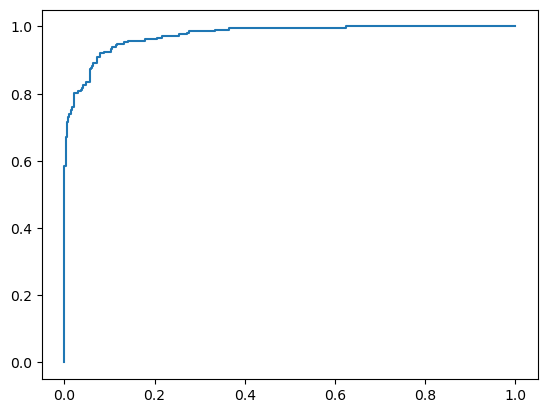

In [16]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label="ROC")

* ROC AUC 값

In [17]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y,y_pred2))

0.8597986364357064
